# Gradient Boost para regresión

<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/my_docs/logo_unal_color.png" alt="drawing" width="200"/>

En este notebook se muestra un ejemplo de Gradient Boost para regresión.

Este estimador construye un modelo aditivo de manera progresiva y por etapas; permite la optimización de funciones de pérdida diferenciables arbitrarias. En cada etapa, se ajusta un árbol de regresión sobre el gradiente negativo de la función de pérdida dada..

La función que vamos a usar es:

`sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)`

Más detalles de la función pueden ser consultados [en este enlace](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor).

El objetivo del presente ejemplo es crear un modelo AdaBoost para estimar la variable $y$, número de satélites en la espalda de la cangreja, usando como covariables $weight$ y $width$. En la siguiente figura se muestra una figura ilustrativa del problema.

<img src="cangreja_con_un_satelite.png" alt="drawing" width="400"/>

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('crabs.txt', sep=' ', header=0)
datos.head() # Para ver el encabezado de los datos

,crab,y,weight,width,color,spine
1,1,8,3.05,28.3,2,3
2,2,0,1.55,22.5,3,3
3,3,9,2.30,26.0,1,1
4,4,0,2.10,24.8,3,3
5,5,4,2.60,26.0,3,3


In [3]:
datos.shape # Para ver la dimensión de la base de datos

(173, 6)

El código que se muestra abajo sirve para crear la matriz $\mathbf{X}$ y el vector $\mathbf{y}$ para entrenar el modelo.

In [4]:
X = datos[["weight", "width"]]
y = datos["y"]

mod = GradientBoostingRegressor(random_state=0, loss='squared_error', learning_rate=0.1, n_estimators=100)
mod.fit(X, y)

GradientBoostingRegressor(random_state=0)

Vamos a estimar el número de satélites y para dos hembras con la siguiente información:

- Hembra 1: weight=3.05 y width=28.3
- Hembre 2: weight=1.55 y width=22.5

In [5]:
new_X = {'weight': [3.05, 1.55],
         'width' : [28.3, 22.5]}
new_X = pd.DataFrame(new_X)
print(new_X)

print("\nThe predicted y's are:")
mod.predict(new_X)

   weight  width
0    3.05   28.3
1    1.55   22.5

The predicted y's are:


array([8.38006071, 0.86684822])

Vamos a calcular el coeficiente de correlación de Pearson entre $y$ y $\hat{y}$.

In [6]:
y_hat = mod.predict(X)

# Correlación entre y e y_hat
print(numpy.corrcoef(y, y_hat))

[[1.         0.83504121]
 [0.83504121 1.        ]]


Ahora vamos a calcular el $MSE=\frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y}_i)^2$.

In [7]:
def my_mse(y, y_hat):
    n = len(y)
    res = sum((y - y_hat)**2) / n
    return res

In [8]:
my_mse(y, y_hat)

3.363498936136348

Ahora vamos a crear un diagrama de dispersión entre $y$ y $\hat{y}$.

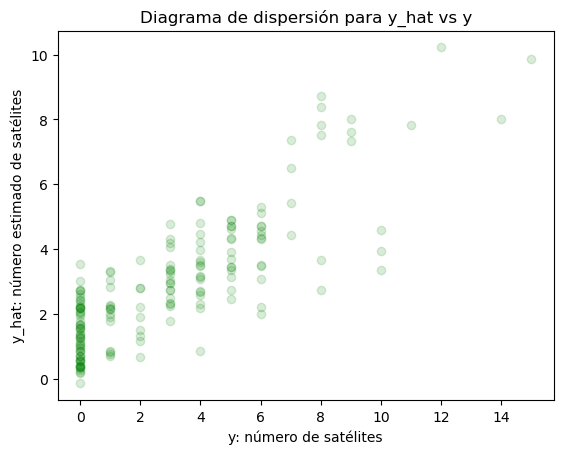

In [9]:
plt.scatter(x=y, y=y_hat, color='green', alpha=0.15)
plt.xlabel('y: número de satélites')
plt.ylabel('y_hat: número estimado de satélites')
plt.title('Diagrama de dispersión para y_hat vs y');

## Explorando la función de pérdida

In [10]:
mod_sqr = GradientBoostingRegressor(random_state=0, loss='squared_error', 
                                    learning_rate=0.1, n_estimators=100)
mod_sqr.fit(X, y)

mod_abs = GradientBoostingRegressor(random_state=0, loss='absolute_error', 
                                    learning_rate=0.1, n_estimators=100)
mod_abs.fit(X, y)

mod_hub = GradientBoostingRegressor(random_state=0, loss='huber', 
                                    learning_rate=0.1, n_estimators=100)
mod_hub.fit(X, y)

mod_qua = GradientBoostingRegressor(random_state=0, loss='quantile', 
                                    learning_rate=0.1, n_estimators=100)
mod_qua.fit(X, y)

y_hat_sqr = mod_sqr.predict(X)
y_hat_abs = mod_abs.predict(X)
y_hat_hub = mod_hub.predict(X)
y_hat_qua = mod_qua.predict(X)

print('MSE con función de pérdida squared_error:', my_mse(y, y_hat_sqr))
print('MSE con función de pérdida absolute_error:', my_mse(y, y_hat_abs))
print('MSE con función de pérdida huber:', my_mse(y, y_hat_hub))
print('MSE con función de pérdida quantile:', my_mse(y, y_hat_qua))

MSE con función de pérdida squared_error: 3.363498936136348
MSE con función de pérdida absolute_error: 8.34846363089658
MSE con función de pérdida huber: 3.998025852271998
MSE con función de pérdida quantile: 20.50096753350945


## Explorando el número de estimador con loss fijo

In [11]:
mod_10 = GradientBoostingRegressor(random_state=0, loss='squared_error', 
                                   learning_rate=0.1, n_estimators=10)
mod_10.fit(X, y)

mod_30 = GradientBoostingRegressor(random_state=0, loss='squared_error', 
                                   learning_rate=0.1, n_estimators=30)
mod_30.fit(X, y)

mod_50 = GradientBoostingRegressor(random_state=0, loss='squared_error', 
                                   learning_rate=0.1, n_estimators=50)
mod_50.fit(X, y)

y_hat_10 = mod_10.predict(X)
y_hat_30 = mod_30.predict(X)
y_hat_50 = mod_50.predict(X)

print('MSE con n=10:', my_mse(y, y_hat_10))
print('MSE con n=30:', my_mse(y, y_hat_30))
print('MSE con n=50:', my_mse(y, y_hat_50))

MSE con n=10: 7.559662573809192
MSE con n=30: 5.686737629497408
MSE con n=50: 4.695177150243718
